# Credit Risk Scoring
Usinig a database of debtors, score the borrowers and create a model which can predit if a debtor would be results as a good or bad borrower.
# Contents

1. Data Exploration
        1.1. General Overview
        1.2. Feature Characteristics

2. Data Clean
        2.1. Perform Cleaning
        2.2. Cleaned Data Inspection
        
3. Preprocessing
        3.1. Create Subsets
        3.2. Training/Test Datasets
        3.3. Training/Test Inspections
        3.4. Stratified Split
        3.5. Good/Bad Imbalance

4. Variable Selection
        4.1. Information Value
        4.2. Weight of Evidence Bins
        4.3. Create Binaries
                
5. The Models
        5.1. Creating The Models
        5.2. Stepwise Selection
        
6. Performance Evaluation
        6.1. Predictions
        6.2. Receiver Operating Characteristic (ROC) curve
        6.3. Gini Coefficient
        6.4. Kolmogorov-Smirnov (KS) Statistic
        
7. Concluding Remarks

In [1]:
# Packages to Install
# install.packages("tidyverse")
# install.packages("scorecard")
# install.packages('janitor')
# install.packages('MASS')
# install.packages('ROCR')

# Libraries to Read in
library(readxl) 
library(tidyr)
library(dplyr) 
library(scorecard) 
library(janitor) 
library(MASS)
library(ROCR)

# Import the data
df <- read_excel('CreditData.xlsx', sheet = 'Sheet1')


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'scorecard'


The following object is masked from 'package:tidyr':

    replace_na



Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




## 1. Data Exploration
### 1.1 General Overview
Explore the credit data to get a general feel for  the features.

In [2]:
summary(df)
describe(df)

    Checking        Duration       History        Purpose         
 Min.   :1.000   Min.   : 4.0   Min.   :0.000   Length:1000       
 1st Qu.:1.000   1st Qu.:12.0   1st Qu.:2.000   Class :character  
 Median :2.000   Median :18.0   Median :2.000   Mode  :character  
 Mean   :2.577   Mean   :20.9   Mean   :2.545                     
 3rd Qu.:4.000   3rd Qu.:24.0   3rd Qu.:4.000                     
 Max.   :4.000   Max.   :72.0   Max.   :4.000                     
     Amount         Savings         Emploed         Installp    
 Min.   :  250   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.: 1366   1st Qu.:1.000   1st Qu.:3.000   1st Qu.:2.000  
 Median : 2320   Median :1.000   Median :3.000   Median :3.000  
 Mean   : 3271   Mean   :2.105   Mean   :3.384   Mean   :2.973  
 3rd Qu.: 3972   3rd Qu.:3.000   3rd Qu.:5.000   3rd Qu.:4.000  
 Max.   :18424   Max.   :5.000   Max.   :5.000   Max.   :4.000  
    marital          Coapp          Resident        Property    
 Min.   :1.

variable,class,count,missing_rate,unique_count,identical_rate,min,p25,p50,p75,max,mean,sd,cv
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Checking,numeric,1000,0,4,0.394,1,1.0,2.0,4.00,4,2.577,1.2576,0.4880
Duration,numeric,1000,0,33,0.184,4,12.0,18.0,24.00,72,20.903,12.0588,0.5769
History,numeric,1000,0,5,0.530,0,2.0,2.0,4.00,4,2.545,1.0831,0.4256
Purpose,character,1000,0,10,0.280,NA,NA,NA,NA,NA,NA,NA,NA
Amount,numeric,1000,0,921,0.003,250,1365.5,2319.5,3972.25,18424,3271.258,2822.7369,0.8629
Savings,numeric,1000,0,5,0.603,1,1.0,1.0,3.00,5,2.105,1.5800,0.7506
Emploed,numeric,1000,0,5,0.339,1,3.0,3.0,5.00,5,3.384,1.2083,0.3571
Installp,numeric,1000,0,4,0.476,1,2.0,3.0,4.00,4,2.973,1.1187,0.3763
marital,numeric,1000,0,4,0.548,1,2.0,3.0,3.00,4,2.682,0.7081,0.2640


### 1.2 Feature Characteristics
Explore each of the features in more depth, unnderstanding the unique values, and making sure there are no inconsistencies.

In [3]:
# Statistical summmary (class, count, min, max, mean, sd)
describe(df)

# Inspecting the unique values and their frequencies 
for (i in 1: ncol(df)) {
    print(colnames(df[,i]))
    print('Numer of unique  values:')
    print(nrow(unique(df[,i])))
    print('unque value frequency:')
    print(table(df[,i]))
    print('******************')
}

# Test for Age Assumption
test <- vector()
for (i in df$Age) {
    if (i  >= 100 | i < 18) {
        print('Age Violation!')
    }
}

# Check all entries if either both marked as 'Good' or both marked as 'Bad'
for (i in 1:nrow(df)) {
    if ((df[i,21] == 1 && df[i,22] == 1) | (df[i,21] == 0 && df[i,22] == 0)) {
        print('Classification Error!')
    }
}

variable,class,count,missing_rate,unique_count,identical_rate,min,p25,p50,p75,max,mean,sd,cv
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Checking,numeric,1000,0,4,0.394,1,1.0,2.0,4.00,4,2.577,1.2576,0.4880
Duration,numeric,1000,0,33,0.184,4,12.0,18.0,24.00,72,20.903,12.0588,0.5769
History,numeric,1000,0,5,0.530,0,2.0,2.0,4.00,4,2.545,1.0831,0.4256
Purpose,character,1000,0,10,0.280,NA,NA,NA,NA,NA,NA,NA,NA
Amount,numeric,1000,0,921,0.003,250,1365.5,2319.5,3972.25,18424,3271.258,2822.7369,0.8629
Savings,numeric,1000,0,5,0.603,1,1.0,1.0,3.00,5,2.105,1.5800,0.7506
Emploed,numeric,1000,0,5,0.339,1,3.0,3.0,5.00,5,3.384,1.2083,0.3571
Installp,numeric,1000,0,4,0.476,1,2.0,3.0,4.00,4,2.973,1.1187,0.3763
marital,numeric,1000,0,4,0.548,1,2.0,3.0,3.00,4,2.682,0.7081,0.2640


[1] "Checking"
[1] "Numer of unique  values:"
[1] 4
[1] "unque value frequency:"

  1   2   3   4 
274 269  63 394 
[1] "******************"
[1] "Duration"
[1] "Numer of unique  values:"
[1] 33
[1] "unque value frequency:"

  4   5   6   7   8   9  10  11  12  13  14  15  16  18  20  21  22  24  26  27 
  6   1  75   5   7  49  28   9 179   4   4  64   2 113   8  30   2 184   1  13 
 28  30  33  36  39  40  42  45  47  48  54  60  72 
  3  40   3  83   5   1  11   5   1  48   2  13   1 
[1] "******************"
[1] "History"
[1] "Numer of unique  values:"
[1] 5
[1] "unque value frequency:"

  0   1   2   3   4 
 40  49 530  88 293 
[1] "******************"
[1] "Purpose"
[1] "Numer of unique  values:"
[1] 10
[1] "unque value frequency:"

  0   1   2   3   4   5   6   8   9   X 
234 103 181 280  12  22  50   9  97  12 
[1] "******************"
[1] "Amount"
[1] "Numer of unique  values:"
[1] 921
[1] "unque value frequency:"

  250   276   338   339   343   362   368   385   392   409   42

## 2. Data Clean
### 2.1. Perform Cleaning
Clean the data of incorrect formatting or inconsistencies noted in the data exploration from section 1.

In [4]:
# Make Corrections to the dataframe
df <- df %>% 
rename (
    Employed = Emploed # Correct Spelling
) %>%
mutate (
    # Change value to '10' and make variable numeric
    Purpose = replace(Purpose, Purpose == 'X', 10),
    Purpose = as.numeric(Purpose)
) %>% 
dplyr::select(
    -Bad # Remove Variable
)

### 2.2. Cleaned Data Inspection
Inspecting the cleaned data.

In [5]:
# Briefly Check each feature
str(df)
print('##################################################################')

# Inspecting the unique values and their frequencies again to make sure cleaned well, including min numbers
for (i in 1: ncol(df)) {
    print(colnames(df[,i]))
    print('Numer of unique  values:')
    print(nrow(unique(df[,i])))
    print('unque value frequency:')
    print(table(df[,i]))
    print('Min num:')
    print(min(df[,i]))
    print('******************')
    print('------------------')
}

tibble[,21] [1,000 x 21] (S3: tbl_df/tbl/data.frame)
 $ Checking : num [1:1000] 1 2 4 1 1 4 4 2 4 2 ...
 $ Duration : num [1:1000] 6 48 12 42 24 36 24 36 12 30 ...
 $ History  : num [1:1000] 4 2 4 2 3 2 2 2 2 4 ...
 $ Purpose  : num [1:1000] 3 3 6 2 0 6 2 1 3 0 ...
 $ Amount   : num [1:1000] 1169 5951 2096 7882 4870 ...
 $ Savings  : num [1:1000] 5 1 1 1 1 5 3 1 4 1 ...
 $ Employed : num [1:1000] 5 3 4 4 3 3 5 3 4 1 ...
 $ Installp : num [1:1000] 4 2 2 2 3 2 3 2 2 4 ...
 $ marital  : num [1:1000] 3 2 3 3 3 3 3 3 1 4 ...
 $ Coapp    : num [1:1000] 1 1 1 3 1 1 1 1 1 1 ...
 $ Resident : num [1:1000] 4 2 3 4 4 4 4 2 4 2 ...
 $ Property : num [1:1000] 1 1 1 2 4 4 2 3 1 3 ...
 $ Age      : num [1:1000] 67 22 49 45 53 35 53 35 61 28 ...
 $ Other    : num [1:1000] 3 3 3 3 3 3 3 3 3 3 ...
 $ housing  : num [1:1000] 2 2 2 3 3 3 2 1 2 2 ...
 $ Existcr  : num [1:1000] 2 1 1 1 2 1 1 1 1 2 ...
 $ Job      : num [1:1000] 3 3 2 3 3 2 3 4 2 4 ...
 $ Depends  : num [1:1000] 1 1 2 2 2 2 1 1 1 1 ...
 $ Te

## 3. Preprocessing
### 3.1. Create Subsets
As per the question specifications, the initial subset should be split into the following categories before they are split into training and test sets:
- Customers with checking account 1 or 2
- Customers with checking account 3 or 4

In [6]:
# Create Subset 1 with Checking=1 or Checking=2
sub1 <- df %>% filter(
    Checking == 1 | Checking ==2
)
# Audit Subset 1 to ensure all entries accounted for
sub1 %>% group_by(Checking) %>%
summarise(
    good = length(which(Good==1)),
    bad = length(which(Good==0)),
    Total = n(),
) %>%
adorn_totals(
    "row" # Add Total Row
)


# Create Subset 2 with Checking=3 or Checking=4
sub2 <- df %>% filter (
    Checking == 3 | Checking == 4
)
# Audit Subset 2 to ensure all entries accounted for
sub2 %>% group_by(Checking) %>%
summarise(
    good = length(which(Good==1)),
    bad = length(which(Good==0)),
    Total = n()
) %>%
adorn_totals(
    "row" # Add Total Row
)

Checking,good,bad,Total
<chr>,<int>,<int>,<int>
1,139,135,274
2,164,105,269
Total,303,240,543


Checking,good,bad,Total
<chr>,<int>,<int>,<int>
3,49,14,63
4,348,46,394
Total,397,60,457


### 3.2. Training/Test Datasets
Splitting each of the subsets into a training and test dataset.

In [7]:
# Split Subset 1 into training/test
sub1_split <- split_df(sub1, y='Good', ratios=c(0.7,0.3), seed = 28, name_dfs = c('train','test'))
sub1_train <- sub1_split$train
sub1_test <- sub1_split$test

# Split Subset 2 into training/test
sub2_split <- split_df(sub2, y='Good', ratios=c(0.7,0.3), seed = 28, name_dfs = c('train','test'))
sub2_train <- sub2_split$train
sub2_test <- sub2_split$test



### 3.3. Training/Test Inspections
inspect each of the trannig and test sets to review the split. The subset can be changed by the commmenttary '# CHANGE ME' seen below.

In [8]:
df_total_check <- sub1       # CHANGE ME
df_train_check <- sub1_train # CHANGE ME
df_test_check <- sub1_test   # CHANGE ME

x <- df_train_check %>%
summarise(
    sub = 'Training',
    good = length(which(Good==1)),
    bad = length(which(Good==0)),
    Total = n(),
) 

y <- df_test_check %>%
summarise(
    sub = 'Test',
    good = length(which(Good==1)),
    bad = length(which(Good==0)),
    Total = n(),
)

df3 = bind_rows(x, y)
df3 %>%
adorn_totals(
    "row"
)

describe(df_total_check)
describe(df_train_check)
describe(df_test_check)

,sub,good,bad,Total
,<chr>,<int>,<int>,<int>
1,Training,208,172,380
2,Test,95,68,163
3,Total,303,240,543


variable,class,count,missing_rate,unique_count,identical_rate,min,p25,p50,p75,max,mean,sd,cv
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Checking,numeric,543,0,2,0.5046,1,1.0,1,2,2,1.4954,0.5004,0.3347
Duration,numeric,543,0,30,0.1786,6,12.0,18,27,72,22.0037,12.7104,0.5776
History,numeric,543,0,5,0.5635,0,2.0,2,3,4,2.3536,1.0765,0.4574
Purpose,numeric,543,0,10,0.2541,0,0.0,2,3,10,2.8637,2.8724,1.0030
Amount,numeric,543,0,526,0.0037,276,1356.5,2439,4289,18424,3498.3867,3089.4724,0.8831
Savings,numeric,543,0,5,0.6832,1,1.0,1,2,5,1.8343,1.4382,0.7841
Employed,numeric,543,0,5,0.3260,1,2.0,3,4,5,3.2523,1.2348,0.3797
Installp,numeric,543,0,4,0.4788,1,2.0,3,4,4,2.9687,1.1303,0.3807
marital,numeric,543,0,4,0.5212,1,2.0,3,3,4,2.6667,0.7348,0.2756


variable,class,count,missing_rate,unique_count,identical_rate,min,p25,p50,p75,max,mean,sd,cv
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Checking,numeric,380,0,2,0.5211,1,1.00,1.0,2,2,1.4789,0.5002,0.3382
Duration,numeric,380,0,27,0.1947,6,12.00,18.0,30,60,22.1132,12.5208,0.5662
History,numeric,380,0,5,0.5553,0,2.00,2.0,3,4,2.3974,1.0836,0.4520
Purpose,numeric,380,0,10,0.2605,0,0.00,2.0,3,10,2.8605,2.8965,1.0126
Amount,numeric,380,0,368,0.0053,338,1330.25,2362.5,4257,18424,3457.7289,3104.4779,0.8978
Savings,numeric,380,0,5,0.6868,1,1.00,1.0,2,5,1.8211,1.4196,0.7796
Employed,numeric,380,0,5,0.3211,1,2.00,3.0,4,5,3.2421,1.2346,0.3808
Installp,numeric,380,0,4,0.5132,1,2.00,4.0,4,4,3.0474,1.1126,0.3651
marital,numeric,380,0,4,0.5105,1,2.00,3.0,3,4,2.6684,0.7232,0.2710


variable,class,count,missing_rate,unique_count,identical_rate,min,p25,p50,p75,max,mean,sd,cv
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Checking,numeric,163,0,2,0.5337,1,1.0,2,2.0,2,1.5337,0.5004,0.3263
Duration,numeric,163,0,24,0.1595,6,12.0,18,24.0,72,21.7485,13.1775,0.6059
History,numeric,163,0,5,0.5828,0,2.0,2,3.0,4,2.2515,1.0561,0.4691
Purpose,numeric,163,0,9,0.2577,0,1.0,2,3.0,10,2.8712,2.8244,0.9837
Amount,numeric,163,0,163,0.0061,276,1427.5,2528,4324.0,15672,3593.1718,3061.6008,0.8521
Savings,numeric,163,0,5,0.6748,1,1.0,1,2.0,5,1.8650,1.4846,0.7960
Employed,numeric,163,0,5,0.3374,1,2.0,3,4.0,5,3.2761,1.2387,0.3781
Installp,numeric,163,0,4,0.3988,1,2.0,3,4.0,4,2.7853,1.1533,0.4141
marital,numeric,163,0,4,0.5460,1,2.0,3,3.0,4,2.6626,0.7635,0.2868


### 3.4. Stratified Split
Verify proportion of each feature in each of the training and test datasets in comparison to the overeall subset. Ideally we would want a small a difference as possible in each as this would confirm that the training and test sets are reflective of the overall dataset.

In [9]:
strat_info <- function (dataset) {
    out <- list()    
    strat_split_df <- data.frame(Train = numeric(),
                                 Test= numeric())
    sub_split <- split_df(dataset, y='Good', ratios=c(0.7,0.3), seed = 28, name_dfs = c('train','test'))
    out$train <- sub_split$train
    out$test <- sub_split$test
    
    for (col in 1:ncol(dataset)) {
        if (nrow(unique(dataset[,col])) < 10) {
            name <- colnames(dataset[,col])
            df_all <- table(dataset[,col])/nrow(dataset[,col])
            
            
            row_values <- vector()
            for (i in sub_split) {
                df_split <- table(i[, ..col])/nrow(i[, ..col])
                df_meanDiff <- mean(abs(df_all-df_split))
                row_values <- append(row_values, df_meanDiff)
            }
            strat_split_df[name,] <- row_values
        }
    }
    
    
    out$strat <- strat_split_df
    return(out)
}

sub1_strat <- strat_info(sub1)
sub1_strat$strat

sub2_strat <- strat_info(sub2)
sub2_strat$strat

write.csv(x=sub2_strat$strat, file="sub2Strat.csv")
write.csv(x=sub1_strat$strat, file="sub1Strat.csv")


,Train,Test
,<dbl>,<dbl>
Checking,0.016448580,0.038346383
History,0.007085393,0.016518094
Savings,0.006395270,0.014909218
Employed,0.005078996,0.011840604
Installp,0.017168266,0.040024178
marital,0.010187070,0.023748997
Coapp,0.002096863,0.004888392
Resident,0.013213628,0.030804777
Property,0.008585345,0.020014914


,Train,Test
,<dbl>,<dbl>
Checking,0.0009129047,0.002004560
History,0.0088168476,0.019360071
Savings,0.0057701153,0.012670043
Employed,0.0097506585,0.021410537
Installp,0.0139130859,0.030550412
marital,0.0087562196,0.019226944
Coapp,0.0116563762,0.025595120
Resident,0.0102963107,0.022608682
Property,0.0044251488,0.009716760


### 3.5. Good/Bad Imbalance
Check the good/bad split to see the absolute numbers in each dataset. This indicates if there are any imbalances that will affect the training process and the models developed.

In [10]:
GoodAndBad <- function (dataset) {
    
    strat_split_df <- data.frame(Good = numeric(),
                                 Bad= numeric(),
                                 Together = numeric())
    
    strat_split_df['All',] = c(sum(dataset$Good == 1), sum(dataset$Good == 0), length(dataset$Good))
    
    sub_split <- split_df(dataset, y='Good', ratios=c(0.7,0.3), seed = 28, name_dfs = c('train','test'))
    
    train <- sub_split$train
    strat_split_df['Train',] = c(sum(train$Good == 1), sum(train$Good == 0), length(train$Good))
    
    test <- sub_split$test
    strat_split_df['Test',] = c(sum(test$Good == 1), sum(test$Good == 0), length(test$Good))
    
    return(strat_split_df)
}

GoodAndBad(sub1)

,Good,Bad,Together
,<dbl>,<dbl>,<dbl>
All,303,240,543
Train,208,172,380
Test,95,68,163


## 4.  Variable Selection

### 4.1. Information Value
Use the information value to determine which are the top four features in each subset. This indicates which four features have the most explanatory power

In [11]:
# Information Values for Subset 1 Training Split
sub1_iv <- iv(sub1_train, y='Good', positive = 'bad|0')
sub1_iv_selec <- sub1_iv$variable[1:4]
sub1_iv_selec


# Informtion Values for Subset 2 Training Split
sub2_iv <- iv(sub2_train, y='Good', positive = 'bad|0')
sub2_iv_selec <- sub2_iv$variable[1:4]
sub2_iv_selec


[1] "Age"      "Duration" "Purpose"  "History"

[1] "Age"      "Duration" "Purpose"  "Other"

### 4.2. Weight of Evidence Bins
Use the column names above, nd calculate the weight of evidence bins with the most explanatory power. These bines will determine how each respective feature is grouped.

In [12]:
# Exract predictor variables for each training set
sub1_train_mod <- sub1_train[,c('Age', 'Duration', 'Purpose', 'History', 'Good')]
sub2_train_mod <- sub2_train[,c('Age', 'Duration', 'Purpose', 'Other', 'Good')]

# Use Chi-Squared merge to establish bins for binary encoding
sub1_train_mod_bins <- woebin(sub1_train_mod, y='Good', method='chimerge',positive = 'bad|0', bin_num_limit = 10)
sub2_train_mod_bins <- woebin(sub2_train_mod, y='Good', method='chimerge',positive = 'bad|0', bin_num_limit = 10)

# Observe binning results
sub1_train_mod_bins
sub2_train_mod_bins

[INFO] creating woe binning ... 
[INFO] creating woe binning ... 


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Age,"[-Inf,24)",50,0.13157895,22,28,0.5600000,0.43120566,0.0245879793,0.1029537,24,FALSE
Age,"[24,25)",22,0.05789474,7,15,0.6818182,0.95218365,0.0509946300,0.1029537,25,FALSE
Age,"[25,27)",34,0.08947368,18,16,0.4705882,0.07226057,0.0004685949,0.1029537,27,FALSE
Age,"[27,28)",19,0.05000000,12,7,0.3684211,-0.34895290,0.0059303265,0.1029537,28,FALSE
Age,"[28,31)",53,0.13947368,32,21,0.3962264,-0.23116986,0.0073403668,0.1029537,31,FALSE
Age,"[31,33)",22,0.05789474,14,8,0.3636364,-0.36957219,0.0076856470,0.1029537,33,FALSE
Age,"[33,40)",71,0.18684211,40,31,0.4366197,-0.06484865,0.0007830561,0.1029537,40,FALSE
Age,"[40,47)",49,0.12894737,29,20,0.4081633,-0.18151995,0.0042010991,0.1029537,47,FALSE
Age,"[47, Inf)",60,0.15789474,34,26,0.4333333,-0.07822038,0.0009620128,0.1029537,Inf,FALSE


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Age,"[-Inf,24)",21,0.06687898,17,4,0.19047619,0.4773297,0.01811762,0.3694043,24,FALSE
Age,"[24,28)",44,0.14012739,36,8,0.18181818,0.4201713,0.02882927,0.3694043,28,FALSE
Age,"[28,31)",29,0.09235669,23,6,0.20689655,0.5805139,0.03834782,0.3694043,31,FALSE
Age,"[31,33)",27,0.08598726,26,1,0.03703704,-1.3338479,0.09322331,0.3694043,33,FALSE
Age,"[33,37)",56,0.17834395,52,4,0.07142857,-0.6407007,0.05752276,0.3694043,37,FALSE
Age,"[37,46)",65,0.20700637,53,12,0.18461538,0.4388634,0.04676938,0.3694043,46,FALSE
Age,"[46,50)",29,0.09235669,27,2,0.06896552,-0.6784410,0.03293163,0.3694043,50,FALSE
Age,"[50,55)",19,0.06050955,18,1,0.05263158,-0.9661231,0.03931486,0.3694043,55,FALSE
Age,"[55, Inf)",24,0.07643312,22,2,0.08333333,-0.4736466,0.01434769,0.3694043,Inf,FALSE


### 4.3. Create Binaries
Use the WOE bin groups from section 4.2 and create a new dataset with the features grouped as specified. Note, this si esseentially one hot encoding, but rather than every single possible number encoded the values of each feature are split into ranges.

In [13]:
# Create Pre-Processing function for subset 1
sub1_dataTransform <- function(dataset) {
    df <- dataset %>%
    dplyr::select(
        # Select Predictor Variable
        Age, Duration, Purpose, History, Good
    ) %>%
    mutate(
        # Apply binning to the data
        Age_24 = ifelse(Age<24,1,0),
        Age24_25 = ifelse(Age>=24 & Age < 25, 1, 0),
        Age25_27 = ifelse(Age>=25 & Age < 27, 1, 0),
        Age27_28 = ifelse(Age>=27 & Age < 28, 1, 0),
        Age28_31 = ifelse(Age>=28 & Age < 31, 1, 0),
        Age31_33 = ifelse(Age>=31 & Age < 33, 1, 0),
        Age33_40 = ifelse(Age>=33 & Age < 40, 1, 0),
        Age40_47 = ifelse(Age>=40 & Age < 47, 1, 0),
        Duration_8 = ifelse(Duration<8, 1,0),
        Duration8_12 = ifelse(Duration>=8 & Duration <12, 1,0),
        Duration12_18 = ifelse(Duration>=12 & Duration <18, 1,0),
        Duration18_20 = ifelse(Duration>=18 & Duration <20, 1,0),
        Duration20_30 = ifelse(Duration>=20 & Duration <30, 1,0),
        Duration30_34 = ifelse(Duration>=30 & Duration <34, 1,0),
        Duration34_46 = ifelse(Duration>=34 & Duration <46, 1,0),
        Purpose_1 = ifelse(Purpose < 1, 1, 0),
        Purpose1_2 = ifelse(Purpose >= 1 & Purpose < 2, 1, 0),
        Purpose2_3 = ifelse(Purpose >= 2 & Purpose < 3, 1, 0),
        Purpose3_7 = ifelse(Purpose >= 3 & Purpose < 7, 1, 0),
        History_1 = ifelse(History < 1, 1, 0),
        History1_2 = ifelse(History >= 1 & History < 2, 1, 0),
        History2_3 = ifelse(History >= 2 & History < 3, 1, 0),
        History3_4 = ifelse(History >= 3 & History < 4, 1, 0),
        Good = Good,
        .keep = 'none' # remove all other columns
    )
    
    # Return Processed dataset
    return(df)
}


# Create Pre-Processing function for subset 2
sub2_dataTransform <- function(dataset) {
    df <- dataset %>%
    dplyr::select(
        # Select Predictor Variable
        Age, Duration, Purpose, Other, Good
    ) %>%
    mutate(
        # Apply binning to the data
        Age_24 = ifelse(Age<24,1,0),
        Age24_28 = ifelse(Age>=24 & Age < 28, 1, 0),
        Age28_31 = ifelse(Age>=28 & Age < 31, 1, 0),
        Age31_33 = ifelse(Age>=31 & Age < 33, 1, 0),
        Age33_37 = ifelse(Age>=33 & Age < 37, 1, 0),
        Age37_46 = ifelse(Age>=37 & Age < 46, 1, 0),
        Age46_50 = ifelse(Age>=46 & Age < 50, 1, 0),
        Age50_55 = ifelse(Age>=50 & Age < 55, 1, 0),
        Duration_10 = ifelse(Duration<10, 1,0),
        Duration10_12 = ifelse(Duration>=10 & Duration <12, 1,0),
        Duration12_14 = ifelse(Duration>=12 & Duration <14, 1,0),
        Duration14_16 = ifelse(Duration>=14 & Duration <16, 1,0),
        Duration16_20 = ifelse(Duration>=16 & Duration <20, 1,0),
        Duration20_34 = ifelse(Duration>=20 & Duration <34, 1,0),
        Duration34_38 = ifelse(Duration>=34 & Duration <38, 1,0),
        Purpose_1 = ifelse(Purpose < 1, 1, 0),
        Purpose1_3 = ifelse(Purpose >= 1 & Purpose < 3, 1, 0),
        Purpose3_6 = ifelse(Purpose >= 3 & Purpose < 6, 1, 0),
        Purpose6_9 = ifelse(Purpose >= 6 & Purpose < 9, 1, 0),
        Other_2 = ifelse(Other < 2, 1, 0),
        Other2_3 = ifelse(Other >= 2 & Other < 3, 1, 0),
        Good = Good,
        .keep = 'none' # remove all other columns
    )
    
    # Return Processed dataset
    return(df)
}



sub2_transformed <- sub2_dataTransform(sub2_train)
head(sub2_transformed)

Age_24,Age24_28,Age28_31,Age31_33,Age33_37,Age37_46,Age46_50,Age50_55,Duration_10,Duration10_12,...,Duration16_20,Duration20_34,Duration34_38,Purpose_1,Purpose1_3,Purpose3_6,Purpose6_9,Other_2,Other2_3,Good
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


## 5. The Models
Create a linear model and a logistical regression model of each subset, using their respective training subsets.

### 5.1. Creating The Models
Creat models using the subsets and saving the models to an appropariatte variable.

In [14]:
# Preprocess subset1 training dataset
sub1_transformed <- sub1_dataTransform(sub1_train)

# Use proccessed sub1 to train a linear regression model
sub1_model_lin <- glm(formula = Good ~ .,
                      family = 'gaussian',
                      data = sub1_transformed)


# Use proccessed sub1 to train a logistic regression model
sub1_model_log <- glm(formula = Good ~.,
                      family = 'binomial',
                      data = sub1_transformed)

# Create summaries of the respective models
summary(sub1_model_lin)
summary(sub1_model_log)

# Preprocess subset2 training dataset
sub2_transformed <- sub2_dataTransform(sub2_train)

# Use proccessed sub2 to train a linear regression model
sub2_model_lin <- glm(formula = Good ~ .,
                      family = 'gaussian',
                      data = sub2_transformed)


# Use proccessed sub2 to train a logistic regression model
sub2_model_log <- glm(formula = Good ~ .,
                      family = 'binomial',
                      data = sub2_transformed)

# Create summaries of the respective models
summary(sub2_model_lin)
summary(sub2_model_log)



Call:
glm(formula = Good ~ ., family = "gaussian", data = sub1_transformed)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0188  -0.4396   0.1328   0.4077   1.1058  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.58514    0.12711   4.603 5.79e-06 ***
Age_24        -0.09997    0.09387  -1.065 0.287569    
Age24_25      -0.13364    0.11949  -1.118 0.264141    
Age25_27       0.01010    0.10236   0.099 0.921486    
Age27_28       0.10318    0.12477   0.827 0.408839    
Age28_31       0.11758    0.09042   1.300 0.194309    
Age31_33       0.12825    0.11922   1.076 0.282779    
Age33_40       0.01086    0.08451   0.129 0.897782    
Age40_47       0.05456    0.09262   0.589 0.556193    
Duration_8     0.48420    0.13336   3.631 0.000324 ***
Duration8_12   0.52029    0.12311   4.226 3.02e-05 ***
Duration12_18  0.30525    0.10142   3.010 0.002800 ** 
Duration18_20  0.24004    0.11466   2.093 0.037013 *  
Duration20_30  0.17283  


Call:
glm(formula = Good ~ ., family = "binomial", data = sub1_transformed)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3459  -1.0546   0.5427   0.9967   2.4845  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.47191    0.63089   0.748 0.454456    
Age_24        -0.45181    0.43335  -1.043 0.297135    
Age24_25      -0.65134    0.58108  -1.121 0.262322    
Age25_27       0.05968    0.47532   0.126 0.900079    
Age27_28       0.56095    0.60720   0.924 0.355579    
Age28_31       0.56591    0.43345   1.306 0.191690    
Age31_33       0.71587    0.60125   1.191 0.233791    
Age33_40       0.03279    0.40081   0.082 0.934802    
Age40_47       0.26498    0.44300   0.598 0.549745    
Duration_8     2.47777    0.71035   3.488 0.000486 ***
Duration8_12   2.64776    0.65896   4.018 5.87e-05 ***
Duration12_18  1.49695    0.50554   2.961 0.003066 ** 
Duration18_20  1.20211    0.55883   2.151 0.031468 *  
Duration20_30  0.87288  


Call:
glm(formula = Good ~ ., family = "gaussian", data = sub2_transformed)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.07371  -0.00888   0.08103   0.15384   0.48951  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.892647   0.112836   7.911 5.32e-14 ***
Age_24        -0.142976   0.099784  -1.433  0.15297    
Age24_28      -0.071525   0.083060  -0.861  0.38987    
Age28_31      -0.092726   0.090011  -1.030  0.30379    
Age31_33       0.084574   0.092201   0.917  0.35975    
Age33_37       0.022408   0.079414   0.282  0.77801    
Age37_46      -0.088633   0.077853  -1.138  0.25586    
Age46_50      -0.009254   0.089503  -0.103  0.91772    
Age50_55       0.009609   0.099205   0.097  0.92290    
Duration_10   -0.075066   0.091463  -0.821  0.41247    
Duration10_12 -0.104586   0.110841  -0.944  0.34617    
Duration12_14 -0.090669   0.089245  -1.016  0.31049    
Duration14_16 -0.063438   0.098188  -0.646  0.51873    



Call:
glm(formula = Good ~ ., family = "binomial", data = sub2_transformed)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0411   0.2151   0.3554   0.5012   1.4461  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    2.65844    1.19435   2.226   0.0260 *  
Age_24        -1.40289    1.02425  -1.370   0.1708    
Age24_28      -0.69012    0.91073  -0.758   0.4486    
Age28_31      -0.76420    0.94576  -0.808   0.4191    
Age31_33       1.29922    1.33267   0.975   0.3296    
Age33_37       0.42109    0.97457   0.432   0.6657    
Age37_46      -0.81109    0.86731  -0.935   0.3497    
Age46_50       0.09366    1.12575   0.083   0.9337    
Age50_55       0.46123    1.36850   0.337   0.7361    
Duration_10   -0.81362    1.05952  -0.768   0.4425    
Duration10_12 -1.14847    1.21371  -0.946   0.3440    
Duration12_14 -1.05891    1.02076  -1.037   0.2996    
Duration14_16 -0.71805    1.20896  -0.594   0.5526    
Duration16_20 -2.19377  

### 5.2. Stepwise Selection
Use a stepwise selection proess to decrease the number of predictor variables, and ensure the highest possible AIG. The models are saved to a list of models that conatin both the full models and their reduceded versions. This is done to compare their results when appllied to the test dataset at a later stage.

In [15]:
# Save all original sub1 models to a list object
sub1.models <- list()
sub1.models$linear <- sub1_model_lin
sub1.models$logistic <- sub1_model_log

# Save all original sub2 models to a list object
sub2.models <- list()
sub2.models$linear <- sub2_model_lin
sub2.models$logistic <- sub2_model_log

# iterate through the sub1 model list and perform stepwise procedure
for (i in 1:length(sub1.models)) {
    # Add a new reduced model item to  original model list, named: [model name].Reduced
    sub1.models[[paste(names(sub1.models[i]),'.Reduced', sep='')]] <- stepAIC(sub1.models[[i]], direction='backward')
}

# iterate through the sub2 model list and perform stepwise procedure
for (i in 1:length(sub2.models)) {
    # Add a new reduced model item to  original model list, named: [model name].Reduced
    sub2.models[[paste(names(sub2.models[i]),'.Reduced', sep='')]] <- stepAIC(sub2.models[[i]], direction='backward')
}


Start:  AIC=523.86
Good ~ Age_24 + Age24_25 + Age25_27 + Age27_28 + Age28_31 + Age31_33 + 
    Age33_40 + Age40_47 + Duration_8 + Duration8_12 + Duration12_18 + 
    Duration18_20 + Duration20_30 + Duration30_34 + Duration34_46 + 
    Purpose_1 + Purpose1_2 + Purpose2_3 + Purpose3_7 + History_1 + 
    History1_2 + History2_3 + History3_4

                Df Deviance    AIC
- Age25_27       1   77.425 521.87
- History3_4     1   77.426 521.87
- Age33_40       1   77.427 521.88
- Purpose1_2     1   77.435 521.92
- Age40_47       1   77.499 522.23
- Age27_28       1   77.572 522.59
- Duration34_46  1   77.599 522.72
- Age_24         1   77.670 523.07
- Age31_33       1   77.675 523.09
- Age24_25       1   77.695 523.19
- Duration30_34  1   77.786 523.63
- Age28_31       1   77.791 523.66
<none>               77.423 523.86
- Duration20_30  1   78.055 524.94
- History2_3     1   78.063 524.98
- Purpose2_3     1   78.327 526.27
- Duration18_20  1   78.376 526.51
- Purpose3_7     1   78.803 5


Step:  AIC=510.6
Good ~ Age_24 + Age24_25 + Age28_31 + Age31_33 + Duration_8 + 
    Duration8_12 + Duration12_18 + Duration18_20 + Duration20_30 + 
    Purpose_1 + Purpose2_3 + Purpose3_7 + History_1 + History1_2 + 
    History2_3

                Df Deviance    AIC
- Age31_33       1   78.206 509.68
- Duration20_30  1   78.303 510.15
- Age28_31       1   78.364 510.45
<none>               77.985 510.60
- Age24_25       1   78.465 510.93
- Age_24         1   78.504 511.12
- Duration18_20  1   78.648 511.82
- Purpose2_3     1   78.864 512.87
- History2_3     1   78.886 512.97
- Purpose3_7     1   79.840 517.54
- Duration12_18  1   80.142 518.97
- Duration_8     1   80.842 522.28
- History1_2     1   80.978 522.91
- History_1      1   81.139 523.67
- Purpose_1      1   81.765 526.59
- Duration8_12   1   82.198 528.60

Step:  AIC=509.68
Good ~ Age_24 + Age24_25 + Age28_31 + Duration_8 + Duration8_12 + 
    Duration12_18 + Duration18_20 + Duration20_30 + Purpose_1 + 
    Purpose2_3 + Purp


Step:  AIC=488.91
Good ~ Age_24 + Age24_25 + Age27_28 + Age28_31 + Age31_33 + Age40_47 + 
    Duration_8 + Duration8_12 + Duration12_18 + Duration18_20 + 
    Duration20_30 + Duration30_34 + Duration34_46 + Purpose_1 + 
    Purpose2_3 + Purpose3_7 + History_1 + History1_2 + History2_3

                Df Deviance    AIC
- Age40_47       1   449.35 487.35
- Age27_28       1   449.85 487.85
- Duration34_46  1   449.86 487.86
- Age31_33       1   450.57 488.57
- Age24_25       1   450.61 488.61
- Age_24         1   450.66 488.66
- Duration30_34  1   450.72 488.72
<none>               448.91 488.91
- Age28_31       1   451.13 489.13
- Duration20_30  1   451.99 489.99
- History2_3     1   452.60 490.60
- Duration18_20  1   453.74 491.74
- Purpose2_3     1   454.24 492.24
- Purpose3_7     1   458.08 496.08
- Duration12_18  1   458.39 496.39
- History1_2     1   461.59 499.59
- History_1      1   461.74 499.74
- Duration_8     1   463.02 501.02
- Purpose_1      1   467.44 505.44
- Duration8_


Step:  AIC=194.46
Good ~ Age_24 + Age24_28 + Age28_31 + Age31_33 + Age33_37 + Age37_46 + 
    Age46_50 + Duration_10 + Duration10_12 + Duration12_14 + 
    Duration14_16 + Duration16_20 + Duration20_34 + Duration34_38 + 
    Purpose_1 + Purpose1_3 + Purpose3_6 + Purpose6_9 + Other_2 + 
    Other2_3

                Df Deviance    AIC
- Age46_50       1   29.690 192.49
- Age33_37       1   29.694 192.54
- Duration14_16  1   29.729 192.91
- Duration_10    1   29.754 193.18
- Duration20_34  1   29.773 193.38
- Duration10_12  1   29.777 193.42
- Age31_33       1   29.787 193.52
- Duration12_14  1   29.792 193.57
- Age24_28       1   29.804 193.70
- Age28_31       1   29.841 194.09
<none>               29.687 194.46
- Age37_46       1   29.897 194.68
- Other2_3       1   29.919 194.91
- Purpose6_9     1   29.927 195.00
- Age_24         1   29.961 195.35
- Purpose_1      1   30.029 196.06
- Duration34_38  1   30.130 197.11
- Purpose1_3     1   30.260 198.47
- Duration16_20  1   30.319 199.0

Start:  AIC=239.41
Good ~ Age_24 + Age24_28 + Age28_31 + Age31_33 + Age33_37 + Age37_46 + 
    Age46_50 + Age50_55 + Duration_10 + Duration10_12 + Duration12_14 + 
    Duration14_16 + Duration16_20 + Duration20_34 + Duration34_38 + 
    Purpose_1 + Purpose1_3 + Purpose3_6 + Purpose6_9 + Other_2 + 
    Other2_3

                Df Deviance    AIC
- Age46_50       1   195.42 237.42
- Age50_55       1   195.53 237.53
- Age33_37       1   195.59 237.59
- Duration14_16  1   195.76 237.76
- Age24_28       1   196.03 238.03
- Duration_10    1   196.03 238.03
- Age28_31       1   196.11 238.11
- Duration20_34  1   196.18 238.18
- Duration10_12  1   196.30 238.30
- Age37_46       1   196.39 238.39
- Age31_33       1   196.43 238.43
- Duration12_14  1   196.59 238.59
- Purpose6_9     1   197.31 239.31
- Other2_3       1   197.40 239.40
<none>               195.41 239.41
- Age_24         1   197.41 239.41
- Purpose_1      1   198.17 240.17
- Duration34_38  1   199.79 241.79
- Purpose1_3     1   2


Step:  AIC=224.05
Good ~ Age_24 + Age24_28 + Age28_31 + Age37_46 + Duration16_20 + 
    Duration34_38 + Purpose_1 + Purpose1_3 + Purpose3_6 + Purpose6_9 + 
    Other_2 + Other2_3

                Df Deviance    AIC
- Purpose6_9     1   199.53 223.53
- Other2_3       1   199.57 223.57
<none>               198.05 224.05
- Purpose_1      1   200.26 224.26
- Duration34_38  1   201.69 225.69
- Age28_31       1   201.84 225.84
- Age24_28       1   202.25 226.25
- Purpose1_3     1   202.54 226.54
- Age_24         1   203.52 227.52
- Purpose3_6     1   203.64 227.64
- Age37_46       1   203.85 227.85
- Duration16_20  1   204.14 228.14
- Other_2        1   212.13 236.13

Step:  AIC=223.53
Good ~ Age_24 + Age24_28 + Age28_31 + Age37_46 + Duration16_20 + 
    Duration34_38 + Purpose_1 + Purpose1_3 + Purpose3_6 + Other_2 + 
    Other2_3

                Df Deviance    AIC
- Purpose_1      1   200.62 222.62
- Other2_3       1   200.95 222.95
<none>               199.53 223.53
- Purpose1_3     1   

## 6. Performance Evaluation
### 6.1. Predictions
Preprocess the test dataset for each subset and then use those datasets in each model and compare the predicted results to the actual results.

In [16]:
# Create sub1 and sub2 list objects to store the predicted values
sub1.pred <- list()
sub2.pred <- list()


sub1_test.procc <- sub1_dataTransform(sub1_test)
sub2_test.procc <- sub2_dataTransform(sub2_test)

# Apply Models to the the sub1 test set and save predictions to list object
for (i in 1:length(sub1.models)) {
    model_prop <- predict(sub1.models[[i]], sub1_test.procc)
    sub1.pred[[names(sub1.models[i])]] <- prediction(model_prop, sub1_test.procc$Good)
}

# Apply Models to the the sub2 test set and save predictions to list object
for (i in 1:length(sub2.models)) {
    model_prop <- predict(sub2.models[[i]], sub2_test.procc)
    sub2.pred[[names(sub2.models[i])]] <- prediction(model_prop, sub2_test.procc$Good)
}

### 6.2. Receiver Operating Characteristic (ROC) curve
The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at different thresholds. The TPR indicates how good the model is at identifying actual good borrowers as good, so ideally a higher percentage is desired. On the other hand, the FPR tells you how bad the model is at mistaking bad borrowers as good borrowers; thus, a smaller percentage is desired. FPR is also calculated as (1-specificity), where specificity refers to the model’s ability to correctly identify bad borrowers (the number of true negatives relative to the actual number of negatives).

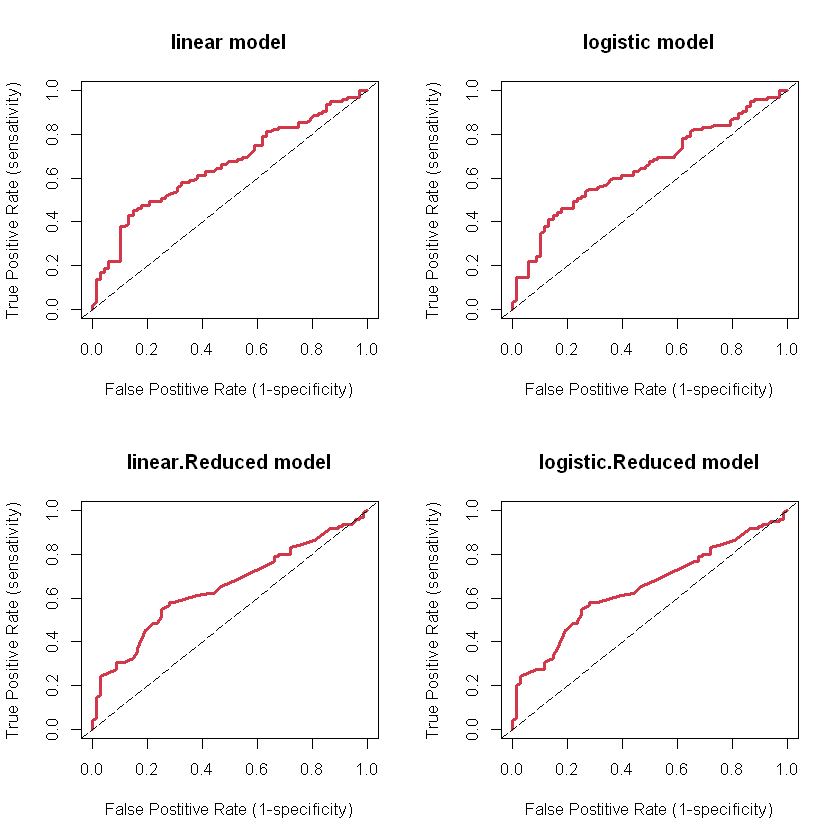

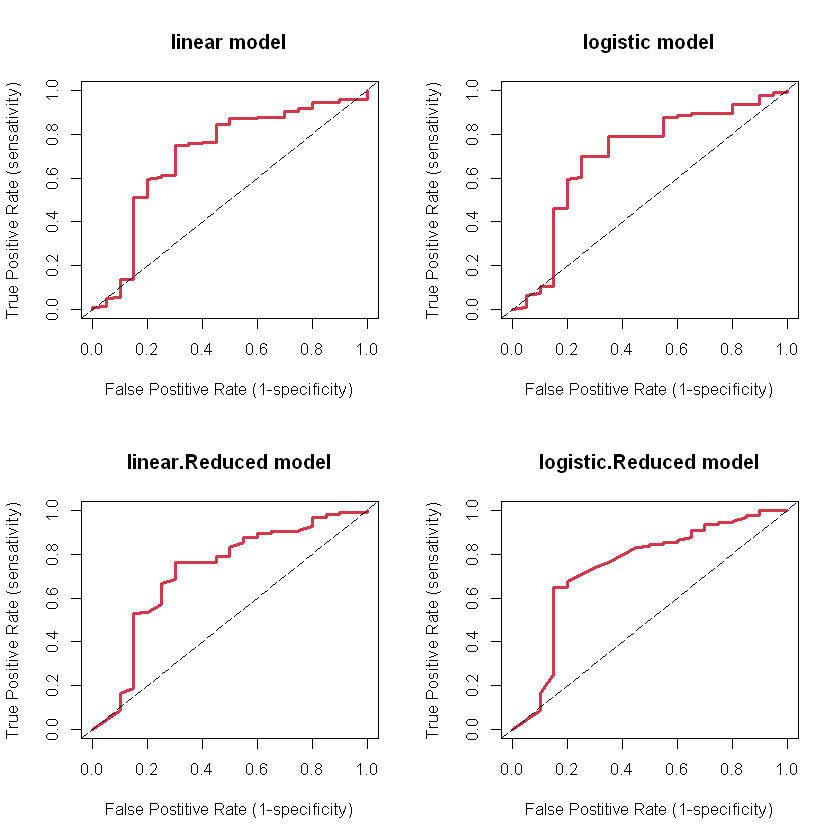

In [17]:
par(mfrow = c(2, 2))

# Create sub1 and sub2 list objects tp store performance
sub1.perf.ROC <- list()
sub2.perf.ROC <- list()

# Generate ROC cruves for Subset1 and plot
for (i in 1:length(sub1.pred)) {
    sub1.perf.ROC[[names(sub1.pred[i])]] <- performance(sub1.pred[[i]], measure = 'tpr', x.measure = 'fpr')
    heading = paste(names(sub1.perf.ROC[i]), 'model', sep=' ')
    plot(sub1.perf.ROC[[i]], main=heading, xlab='False Postitive Rate (1-specificity)', 
        ylab = 'True Positive Rate (sensativity)', col='#d3374a', lwd=3)
    abline(0,1, lty=5)
}

# Generate ROC curves for Subset2 and plot
for (i in 1:length(sub2.pred)) {
    sub2.perf.ROC[[names(sub2.pred[i])]] <- performance(sub2.pred[[i]], measure = 'tpr', x.measure = 'fpr')
    heading = paste(names(sub2.perf.ROC[i]), 'model', sep=' ')
    plot(sub2.perf.ROC[[i]], main=heading, xlab='False Postitive Rate (1-specificity)',
        ylab = 'True Positive Rate (sensativity)', col='#d3374a', lwd=3)
    abline(0,1, lty=5)
}

### 6.3. Gini Coefficient
The Gini coefficient indicates the discriminatory power of the models, demonstrating their ability to differentiate between ‘Good’ and ‘Bad’ borrowers. If population scores are ordered from lowest to highest, the Gini coefficient essentially measures the model’s ability to detect bad borrowers as quickly as possible. The closer the statistic is to 1 the better the models discriminatory ability.

In [18]:
# Create sub1 and sub2 list objects to store Gini
sub1.perf.GINI <- list()
sub2.perf.GINI <- list()

# Calculate Gini for Subset 1
for (i in 1:length(sub1.pred)) {
    auc_calc <- performance(sub1.pred[[i]], measure = 'auc')
    sub1.perf.GINI[[names(sub1.pred[i])]] <- 2 * auc_calc@y.values[[1]] - 1
}

# Calculate Gini for Subset 2
for (i in 1:length(sub2.pred)) {
    auc_calc <- performance(sub2.pred[[i]], measure = 'auc')
    sub2.perf.GINI[[names(sub2.pred[i])]] <- 2 * auc_calc@y.values[[1]] - 1
}

# Display Values
sub1.perf.GINI
sub2.perf.GINI

$linear
[1] 0.3123839

$logistic
[1] 0.3024768

$linear.Reduced
[1] 0.2970588

$logistic.Reduced
[1] 0.2948916

$linear
[1] 0.4158537

$logistic
[1] 0.4077236

$linear.Reduced
[1] 0.4378049

$logistic.Reduced
[1] 0.4833333

### 6.4. Kolmogorov-Smirnov (KS) Statistic
Similar to the Gini coefficient, this metric indicates the ability to determine scores which successfully differentiate between ‘Good’ and ‘Bad’ borrowers. The score distributions of ‘Good’ and ‘Bad’ borrowers are compared, where scores associated with ‘Bad’ borrowers are expected to be distributed at a lower level than that of ‘Good’ borrowers. A minimal difference between the score distributions (close or equal to zero), indicates failure to differentiate between ‘Good’ and ‘Bad’ borrowers. Whereas a larger difference indicates good discriminatory ability.

In [19]:
# Create sub1 and sub2 list objects to store KS Stats
sub1.perf.KS <- list()
sub2.perf.KS <- list()

# Calculate KS stat for Subset 1
for (i in 1:length(sub1.perf.ROC)) {
    tpr <- attr(sub1.perf.ROC[[i]], 'y.values')[[1]]
    fpr <- attr(sub1.perf.ROC[[i]], 'x.values')[[1]]
    sub1.perf.KS[[names(sub1.perf.ROC[i])]] <- max(tpr - fpr)
}

# Calculate KS stat for Subset 2
for (i in 1:length(sub2.perf.ROC)) {
    tpr <- attr(sub2.perf.ROC[[i]], 'y.values')[[1]]
    fpr <- attr(sub2.perf.ROC[[i]], 'x.values')[[1]]
    sub2.perf.KS[[names(sub2.perf.ROC[i])]] <- max(tpr - fpr)
}

# Display Values
sub1.perf.KS
sub2.perf.KS

$linear
[1] 0.3055728

$logistic
[1] 0.2866873

$linear.Reduced
[1] 0.2995356

$logistic.Reduced
[1] 0.2995356

$linear
[1] 0.4479675

$logistic
[1] 0.449187

$linear.Reduced
[1] 0.4642276

$logistic.Reduced
[1] 0.5004065

## 7. Concluding Remarks
The analysis has analysed the credit data and attempted to create several credit scorecards that could potentially be used for new and existing customers. After cleaning and pre-processing the data, both linear and logistic regression were used and the results from the respective models were evaluated. It was observed that these methodologies successfully created models that showed ability in distinguishing between ‘Good’ and ‘Bad’ borrowers. In addition to this it was noted that the reduced models performed to almost the same levels as the full models. Although the sentiment was positive there were areas of concern that perpetuated through the results of the models (such as imbalanced data). This would suggest the improvements are required in pre-processing to strengthen the assumptions made from the analysis. Furthermore, the analysis only considered two algorithms in training the respective models. It is possible that a better model could be created through a different methodology. Nevertheless, the models do appear to be useful in their ability to aid lenders with their credit-based decisions.